<a href="https://colab.research.google.com/github/davidwan08/sales-predictions/blob/main/David_Wan_Project_1_Part_3_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Assignment Name: Project 1 - Part 3 (Core)

# Name: David Wan

# Date: 04/07/2022

The following section was previously performed on Project 1 - Part 1:

**BEGIN PROJECT 1 - PART 1**

In [7]:
#Loads the pandas library into Python.
import pandas as pd

In [8]:
#Imports the csv file into filename.
filename = '/content/sales_predictions.csv'

In [9]:
#Use pandas to upload the file as a dataframe.
df = pd.read_csv(filename)
#Reads the first 5 rows of data using head().
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**END PROJECT 1 - PART 1**

The following section was previously performed on Project 1 - Part 2:

**BEGIN PROJECT 1 - PART 2**



Project 1 - Part 2 (Core)

We will continue to work off of the GitHub repository you created last week for your first portfolio project. The goal of your portfolio projects are to have items to show potential employers that demonstrate your data science skills and competencies.

The first project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

For Part 2, your task is to  use Pandas to start cleaning and exploring the data. As data scientists, about 80% of our time is spent on data preparation - so this is a very important step! 

Your data should already be loaded into your notebook from part 1 of the project.
Explore the data - what do you need to do to clean this data? Clean it!

Here is the Data Dictionary for this dataset:

Variable Name /	Description
- Item_Identifier:	Unique product ID
- Item_Weight:	Weight of product
- Item_Fat_Content:	Whether the product is low fat or regular
- Item_Visibility:	The percentage of total display area of all products in a store allocated to the particular product
- Item_Type:	The category to which the product belongs
- Item_MRP:	Maximum Retail Price (list price) of the product
- Outlet_Identifier:	Unique store ID
- Outlet_Establishment_Year:	The year in which store was established
- Outlet_Size:	The size of the store in terms of ground area covered
- Outlet_Location_Type:	The type of area in which the store is located
- Outlet_Type:	Whether the outlet is a grocery store or some sort of supermarket
- Item_Outlet_Sales:	Sales of the product in the particular store. This is the target variable to be predicted.

1. How many rows and columns?

2. What are the datatypes of each variable?

In [10]:
# Summarizes the rows and columns of the dataset using the info code.
# There are a total of 8523 rows and 12 columns based on the results of the code.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


3. Are there duplicates? If so, drop any duplicates.

In [11]:
# Check for duplicates in the DataFrame.
# So far, no duplicate rows have been discovered based on the results.
df.duplicated().sum()

0

In [12]:
# In case there are duplicates, the following code will resolve this.
# df.drop_duplicates(inPlace = True)

4. Identify missing values.

In [13]:
# Looks like there are missing values in Item_Weight column.
df['Item_Weight'].isna().sum()

1463

In [14]:
# Looks like there are missing values in Outlet_Size column.
df['Outlet_Size'].isna().sum()

2410

In [15]:
# For item weight, I believe the best way to resolve this issue would be to take the average weights.
# Then I would use them as the weight values.
# However, I cannot assume that the average values work for all missing fields, as every item is different!
# Therefore, I will explore options.

In [16]:
# Summarizes the item weight column averages based on item type grouping.
df.groupby(['Item_Type'])['Item_Weight'].mean()

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [17]:
#Copies original DataFrame into the modified DataFrame df_update1 for further analysis.
df_update1 = df.copy(deep=True)
df_update1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [18]:
# Looks like the differences are pretty subtle or insignificant among the item types.
# Therefore, I believe it should be safe to replace missing weights with the average value.
# That should eliminate the missing value issues with item
weight_median = df['Item_Weight'].median()

# The following code should work for replacing the modified dataframe.
df_update1['Item_Weight'].fillna(weight_median, inplace=True)
df_update1.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [19]:
# After first major change to DataFrame, copy DataFrame again into df_update2 for further analysis.

df_update2 = df_update1.copy(deep=True)
df_update2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [20]:
# For the outlet size, let's examine the value counts involved with it.
df_update2['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [21]:
# Attempting to examine how other columns can correlate to outlet sizes.
print(df_update2['Outlet_Location_Type'].unique())
print(df_update2['Outlet_Type'].unique())
print(df_update2['Outlet_Identifier'].unique())

['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


In [22]:
# I don't think there is any way I would be able to infer outlet size based on this data.
# Additionally, I do not believe that outlet size by itself has significance in overall sales.
# What does small, medium, and high really represent?
# I believe that the Outlet_Type provides a much better indicator that Outlet_Size, despite the vagueness of type.
# Therefore, dropping the Outlet_Type column would be a better idea to make more relevant predictions.

df_update2 = df_update2.drop(columns = ['Outlet_Size'])
df_update2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


6. Confirm that there are no missing values after addressing them.

In [23]:
# Information about the modified DataFrame df_update2 as a result.
# This will confirm that there are no more missing values left to address.
df_update2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


7. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [24]:
# Let's summarize what we have so far about df_update2.
df_update2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [25]:
# Let's check each categorical column to see what values are in each one.
# First, lets store the datatypes as data_types.

data_types = df_update2.dtypes
data_types

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [26]:
# Next, lets store all column types of type 'object' into str_cols.
str_cols = data_types[data_types=="object"]
str_cols

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [27]:
# Get index of values
str_cols.index

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [28]:
# View only columns with object Data Type.
df_update2[str_cols.index]

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,Tier 3,Supermarket Type1
...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Tier 3,Supermarket Type2


In [29]:
# Save just index of str_cols.
str_cols = str_cols.index

In [30]:
# Iterate through all object columns to examine values in the columns.
for col in str_cols:
  print(f"{col}:")
  print(df_update2[col].value_counts(dropna=False))
  print("\n\n")

Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT01

In [31]:
# Looks like item fat content is the only column that needs all values adjusted for consistency.
# Let us change the values to have just Low Fat and Regular.

# Copies the df_update2 DataFrame into the df_update3 for further analysis.

df_update3 = df_update2.copy(deep=True)
df_update3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [32]:
# Shows the values for Item_Fat_Content column along with the counts.
df_update3['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [33]:
# Standardize the values in the Item_Fat_Content column.
df_update3['Item_Fat_Content'] = df_update3['Item_Fat_Content'].replace(['low fat', 'LF'],'Low Fat')
df_update3['Item_Fat_Content'] = df_update3['Item_Fat_Content'].replace('reg', 'Regular')
# Verify the values in the column to ensure that the column has standardized values.
df_update3['Item_Fat_Content'].value_counts()
# Notice that Low Fat sum: 5089 + 316 + 112 = 5517.
# Notice that Regular sum: 2889 + 117 = 3006.

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

8. For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [34]:
# Lets store all column types that do NOT have type 'object' into num_cols.
# num_cols = data_types[data_types!="object"]
# num_cols

# Use describe code to obtain summary stats for all numerical columns in df_update3.
df_update3.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


In [35]:
# Rounds the summary values to the nearest hundreth place for cleanliness.
df_update3.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.81,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


**END PROJECT 1 - PART 2**

**BEGIN PROJECT 1 - PART 3**

We will continue to work on your sales prediction project. The goal of this is to help you understand the data as it relates to the  products and outlets that play crucial roles in increasing sales.

For Part3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

- Histogram to view the distributions of various features in your dataset.
- Boxplot to view statistical summaries of various features in your dataset.
- Heatmap of the correlation between features.

Please feel free to add more than the minimum. Remember this is your chance to display your skills!

In [36]:
# We will work with the resulting DataFrame df_update3.
# I would have just stuck with one copied DataFrame overall from before.
# However, the process of doing so would be pretty tedious to say the least.
# For simplicity sake, I will rename the DataFrame df_clean.

df_clean = df_update3.copy(deep=True)

# Let's pull up an overview of the clean data we have so far after renaming.
# First, lets look at the header entries to familiarize.
df_clean.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [37]:
# Next, lets get an overview of the dataframe.
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [38]:
# To start visualization, lets split the columns based on the data type.
# Before we can do any visualization, lets import the necessary libraries.
# We can reimport pandas as needed in case.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [39]:
# Lets examine the data types using dtypes.
data_types = df_clean.dtypes
data_types

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [40]:
# Next, lets separate the columns based on the data types.
# Lets start by creating a list of columns with object data types.
# These columns will be handled as categorical data for visualization purposes.

string_columns = data_types[data_types == "object"]
string_columns

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [41]:
# Also, lets create a list of columsn with numerical data types.
# These columns will be handled as numerical data for visualization purposes.
# I will specify all data types other than object to fulfill this task.

number_columns = data_types[data_types != "object"]
number_columns

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

**Creating a Histogram**

For my histogram, I would like to generate one that details the item MRP across the board. Hopefully that should generate some understanding as to how much the items sales are valued.

Text(0, 0.5, 'Number of Items')

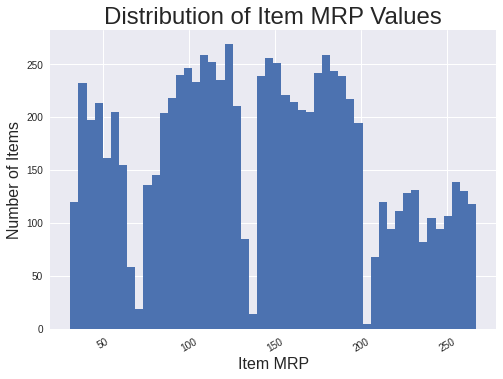

In [58]:
# Lets go ahead and create a histogram plotting the MRP of items sold.
# I want to try Seaborn style just to see how it looks! :)
# Bins is set to 50 to improve the visualization quality of the bars.
# X value rotation is set at 30 degrees.
# I adjusted the font of title and label values for legibility.
# Wish I could tinker with more settings, but I am under time constraint unfortunately. :(

plt.style.use('seaborn')
df_clean['Item_MRP'].hist(bins = 50)
plt.xticks(rotation = 30)
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('Distribution of Item MRP Values', fontsize = 24)
plt.xlabel('Item MRP', fontsize = 16)
plt.ylabel('Number of Items', fontsize = 16)

- Based on what I have observed from the histogram, it seems like the Item MRP values are somewhat evenly distributed across the board, ranging from about 20 to around 270. 
- However, there seems to be separate clusters of MRP values centered around certain values, indicating that certain categories of items may have similar MRP values depending on item type. 
- Also, it seems like the MRP of items favors certain price ranges and disfavors others. 
- For example, not a lot of items are priced at 200-210ish range. This may indicate that items were much more favorable to be priced at 190-200ish. The 199.99 effect may play a role as well in terms of consumer psychology? (Pretty much making the item seem like it costs less than what it actually is.)

**Creating a Boxplot**

For my boxplot, I do want to examine how the item fat content plays a role in the Item MRP value. Are reduced fat products more expensive in general than regular fat products? Hopefully the boxplot will answer that question.

In [59]:
# Lets create a couple of filters that will help us sort the data.
# First, lets examine what values reside in the Item Fat Content column.
# There should be only 2 values in that column: Low Fat and Regular.
df_clean['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [64]:
# Lets create a filter for Low Fat.
lowfat_filter = df_clean['Item_Fat_Content'] == 'Low Fat'
lowfat_filter.head()

0     True
1    False
2     True
3    False
4     True
Name: Item_Fat_Content, dtype: bool

In [65]:
# Lets also create a filter for Regular, only with the ~ symbol.
# This is because what is not lowfat is considered regular.
regular_filter = ~lowfat_filter
regular_filter.head()

0    False
1     True
2    False
3     True
4    False
Name: Item_Fat_Content, dtype: bool

In [66]:
# Lets create a new DataFrame named df_lowfat containing lowfat items.
df_lowfat = df_clean.loc[lowfat_filter, :]
df_lowfat.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
7,FDP10,12.60,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Tier 3,Supermarket Type3,4022.7636
10,FDY07,11.80,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Tier 1,Supermarket Type1,1516.0266


In [67]:
# Lets also create another new DataFrame named df_regular containing regular items.
df_regular = df_clean.loc[regular_filter, :]
df_regular.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,Tier 3,Supermarket Type1,343.5528
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Tier 2,Supermarket Type1,1076.5986


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Item MRP')

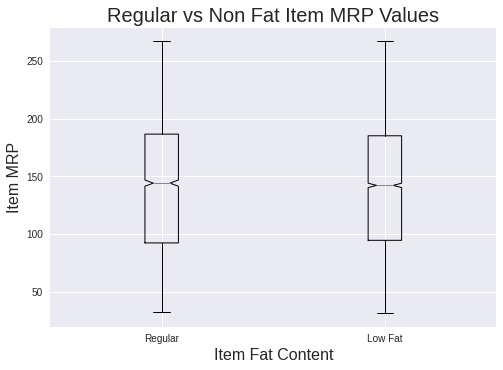

In [75]:
# Now that we have the data separated by item fat content values,
# lets use the dataframes to create our boxplots!
# I went ahead and used most of the same styles as the histogram.

plt.style.use('seaborn')
lowfat = df_lowfat['Item_MRP']
regular = df_regular['Item_MRP']
plt.boxplot([regular,lowfat], notch = True, labels=['Regular', 'Low Fat']);
plt.title('Regular vs Non Fat Item MRP Values', fontsize = 20)
plt.xlabel('Item Fat Content', fontsize = 16)
plt.ylabel('Item MRP', fontsize = 16)

- Based on my observations with the histogram comparing the Item MRP values of regular vs nonfat items, it doesnt appear as though there was any discrepancies in the Item MRP for both categories!
- In addition, it looks as though the boxplot distributions of both item fat content categories are almost identical to each other. 
- Therefore, based on the overlap of the notches, we CANNOT conclude with a 95% confidence interval that the item fat content makes any significant difference in the distribution of Item MRP values.

In [77]:
# Just to confirm that my observations about the boxplot visualization are correct:
# Heres the summary of the Item MRP values for the lowfat DataFrame.
# The median is set at around 142.

df_lowfat['Item_MRP'].describe()

count    5517.000000
mean      140.714098
std        62.311756
min        31.290000
25%        94.477800
50%       142.081200
75%       185.089800
max       266.888400
Name: Item_MRP, dtype: float64

In [78]:
# Heres the summary of the Item MRP values for the regular DataFrame.
# The median is set at around 144.

df_regular['Item_MRP'].describe()

count    3006.000000
mean      141.504259
std        62.214786
min        32.055800
25%        92.221200
50%       144.044400
75%       186.521400
max       266.888400
Name: Item_MRP, dtype: float64

Overall, the data summarization sets for both lowfat and regular confirm my conclusions.

**Creating a Heatmap**

Let us see the heatmap to determine if there are any correlations in the dataset that would be of significance in our data analysis.

In [83]:
# Lets create the heatmap.
# First, lets save the correlation information under corr.

corr = df_clean.corr()
corr.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014168,0.024951,0.007739,0.009693
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024951,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.009693,-0.128625,0.567574,-0.049135,1.000000


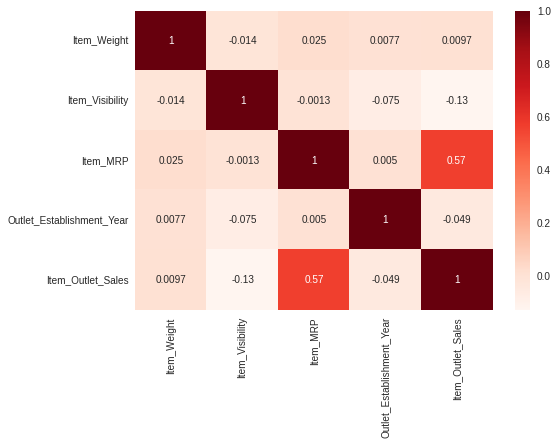

In [84]:
# Lets use corr to generate the heatmap.
sns.heatmap(corr, cmap = 'Reds', annot = True)

- Very interesting heatmap indeed!
- The only correlation value that really stands out is the 0.57 from the Item_MRP to Item_Outlet_Sales relationship.
- This indicates that there is a moderate positive correlation between the 2 columns.
- My reasoning behind this correlation would be that there may be a demand for higher MRP valued items that would drive up the value of item outlet sale values.
- Also, the demand in general for those specific high-MRP items may help elevate the sale values for those outlets.

**END PROJECT 1 - PART 3**